






<h2 id='part1'>Airbnb Boston: Data Understanding and Preparation</h2>

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option('precision', 5)


import src.data.rental_calendar as cal
import src.data.listings as lst
import src.data.reviews as rev
import src.data.util as util

# https://www.airdna.co

<h3>Listings dataset</h3>

In [3]:
city = 'boston'

In [4]:
listings_datafile =f'../data/raw/{city}/listings.csv'
listings = lst.Listings(listings_datafile, city)
listings_df = listings.df

In [5]:
util.stats(listings_df, f'{city} Listings')

boston Listings dataset has 3585 rows, 95 columns
62 columns has object type
51 columns without any missing value
7 columns missing 75% values


In [6]:
listings_df[:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.28262,-71.13307,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United State

In [7]:
property_type_vals = listings_df.property_type.value_counts()
property_type_vals

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [8]:
bed_type_vals = listings_df.bed_type.value_counts()
bed_type_vals

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [9]:
cancellation_policy_vals = listings_df.cancellation_policy.value_counts()
cancellation_policy_vals

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [10]:
prices_df = listings.convert_price(listings_df)
prices_df['price'].describe()

count    3585.00000
mean      173.92580
std       148.33132
min        10.00000
25%        85.00000
50%       150.00000
75%       220.00000
max      4000.00000
Name: price, dtype: float64

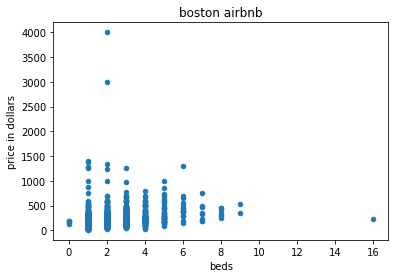

In [11]:
listings.plot_price_with(f'{city} airbnb', prices_df, 'beds')

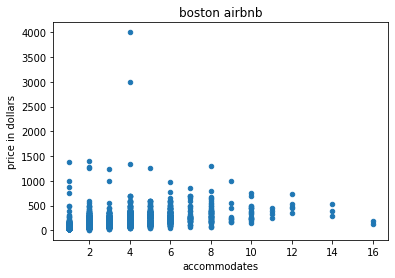

In [12]:
listings.plot_price_with(f'{city} airbnb', prices_df, 'accommodates')

<AxesSubplot:>

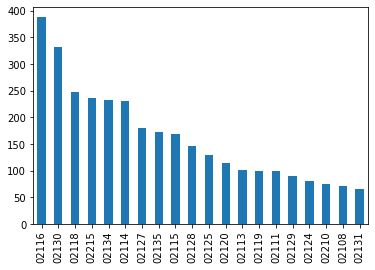

In [13]:
listings_by_zipcode = listings_df['zipcode'].value_counts()
listings_by_zipcode[:20].plot(kind='bar')

In [14]:
rev_cols = listings_df[[c for c in listings_df.columns if 'review' in c]]
rev_cols[:5]

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30
2,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
3,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
4,29,2015-08-18,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25


<h3>Reviews dataset</h3>

In [15]:
reviews_datafile =f'../data/raw/{city}/reviews.csv'
reviews = rev.Reviews(reviews_datafile, city)
reviews_df = reviews.df

util.stats(reviews_df, f'{city} Reviews')

boston Reviews dataset has 68275 rows, 6 columns
3 columns has object type
5 columns without any missing value
0 columns missing 75% values


In [16]:
reviews_df[:2]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


<h3>Calendar dataset</h3>

In [17]:
cal_datafile =f'../data/raw/{city}/calendar.csv'
calendar = cal.RentalCalendar(cal_datafile, city)
calendar_df = calendar.df

util.stats(calendar_df, f'{city} Calendars')

boston Calendars dataset has 1308890 rows, 4 columns
3 columns has object type
3 columns without any missing value
0 columns missing 75% values


In [18]:
calendar_df[:2]

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


<h3>Removing Values</h3>

You can drop values by row or by column, and you can drop based on whether **any** value is missing in a particular row or column or **all** are values in a row or column are missing.

A useful set of many resources in pandas is available [here](https://chrisalbon.com/).  Specifically, Chris takes a close look at missing values [here](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).

In [19]:
# Drop any row with a missing value.
all_drop  = listings_df.dropna()
all_drop.shape

(0, 95)

In [20]:
#axis 0 specifies you drop, how all specifies that you 
all_row = listings_df.dropna(axis=0, how='all') 
all_row.shape

(3585, 95)

In [21]:
#drop a subset of columns with missing data 
only_summary_drop = util.dropna_any(listings_df, ['summary'])
only_summary_drop.shape

(3442, 95)

In [22]:
# Drop only the rows with missing values in two columns
only_summaryorbedrooms_drop = util.dropna_any(listings_df, ['summary', 'bedrooms'])
only_summaryorbedrooms_drop.shape

(3440, 95)

<h3>Imputation Methods and Resources</h3>

One of the most common methods for working with missing values is by imputing the missing values. Imputation means that you input a value for values that were originally missing. 

It is very common to impute in the following ways:
1. Impute the **mean** of a column.<br><br>

2. If you are working with categorical data or a variable with outliers, then use the **mode** of the column.<br><br>

3. Impute 0, a very small number, or a very large number to differentiate missing values from other values.<br><br>

4. Use knn to impute values based on features that are most similar.<br><br>

In general, be very careful with missing data in understanding the real world implications and reasons for why the missing values exist.  At the same time, these solutions are very quick, and they enable you to get models off the ground.  You can then iterate on your feature engineering to be more careful as time permits.

Chris' content is again very helpful for many of these items - access it [here](https://chrisalbon.com/).  He uses the [sklearn.preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html).  There are also a ton of ways to fill in missing values directly using pandas, which can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)


In [23]:
# small amount of rows with beds data missing
dropna_beds = util.dropna_any(listings_df, ['beds'])
dropna_beds.shape

(3576, 95)

In [24]:
# impute missing values of beds with mean
beds_df = util.fill_mean(listings_df, 'beds')
print(f'missing value count: {util.missing_value_count(beds_df, "beds")}')

missing value count: 0


In [25]:
# impute missing values of property_type with mode
property_type_df = listings_df[['property_type']]
print(f'property_type column, missing value count: {util.missing_value_count(property_type_df, "property_type")}')
fill_property_type = util.fill_mode(listings_df, 'property_type', mode_idx=0)
print(f'property_type column after fill mode with index 0, missing value count: {util.missing_value_count(fill_property_type, "property_type")}')

property_type column, missing value count: 3
property_type column after fill mode with index 0, missing value count: 0


In [39]:
price_pred_df = listings.generate_price_pred_dataset()

before processing dataset has 3585 rows, 10 columns
5 columns has object type
4 columns without any missing value
0 columns missing 75% values


In [40]:
price_pred_df.columns

Index(['zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'review_scores_value', 'amenities_count', 'price'],
      dtype='object')

In [41]:
price_pred_df[:5]

,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_value,amenities_count,price
0,2131,House,Entire home/apt,4,1.5,2.0,3.0,NaN,15,250.0
1,2131,Apartment,Private room,2,1.0,1.0,1.0,9.0,21,65.0
2,2131,Apartment,Private room,2,1.0,1.0,1.0,10.0,18,65.0
4,2131,House,Private room,2,1.5,1.0,2.0,10.0,14,79.0
5,2131,Condominium,Private room,2,1.0,1.0,1.0,10.0,13,75.0


In [42]:
util.save(price_pred_df, f'../data/processed/{city}_prices.pkl')

In [30]:
review_scores_df = listings.generate_review_score_dataset()
review_scores_df[:2]

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value
0,12147973,0,NaN,NaN,NaN
1,3075044,36,94.0,10.0,9.0


In [31]:
review = review_scores_df[review_scores_df.id ==1178162]
review

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value
1559,1178162,215,86.0,9.0,9.0


In [32]:
util.save(review_scores_df, f'../data/processed/{city}_review_scores.pkl')

In [33]:
combined_revs = reviews.combined_reviews_and_scores(listings)
util.save(combined_revs, f'../data/processed/{city}_reviews.pkl')